In [54]:
# Importing Libraries
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
from tensorflow.keras import regularizers
import joblib

In [55]:
# Load Dataset
df = pd.read_csv('Data Capstone UMKM  - Full.csv')
df.head()

,Nama UMKM,Produk Utama,Total Aset (Juta),Penjualan Rata-rata Per Tahun (Juta),Jumlah Tenaga Kerja,Nama Badan Hukum,Kategori,Sistem Penjualan,Target Pasar,Proyeksi Pertumbuhan (%/tahun),Kebutuhan Biaya Kredit (Juta),Nilai Aset Jaminan Kredit,Jumlah Dokumen Kredit,Label
0,Kios Perancangan,Pupuk,361.0,400.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,25.0,6.0,0.0,5,LAYAK
1,LAPAK BAHTERA AYAM POTONG,DAGANG,44.6,576.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 juta/bu...,30.0,9.0,15.0,3,LAYAK
2,Budidaya Jamur Tiram,Budidaya Jamur tiram,15.3,36.0,1,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,10.0,10.0,30.0,6,TIDAK LAYAK
3,Holtikultura Srimulyanti,Holtikultura,125.8,75.6,3,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Memenuhi Order Dari Distributor/Eksportir/Trad...,125.8,3.0,92.0,12,LAYAK
4,Toko Pertanian Bu Siswarsini,Toko pertanian,218.0,84.0,2,Perorangan,Pertanian. Kehutanan Dan Perikanan,Ritel,Masyarakat Gol Bawah (penghasilan sd 5 sd 10 j...,5.0,9.5,39.0,7,TIDAK LAYAK


In [56]:
# shape of the dataset
df.shape

(1025, 14)

In [57]:
# Display Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Nama UMKM                             1025 non-null   object 
 1   Produk Utama                          1025 non-null   object 
 2   Total Aset (Juta)                     1025 non-null   float64
 3   Penjualan Rata-rata Per Tahun (Juta)  1025 non-null   float64
 4   Jumlah Tenaga Kerja                   1025 non-null   int64  
 5   Nama Badan Hukum                      1025 non-null   object 
 6   Kategori                              1025 non-null   object 
 7   Sistem Penjualan                      1024 non-null   object 
 8   Target Pasar                          1025 non-null   object 
 9   Proyeksi Pertumbuhan (%/tahun)        1025 non-null   float64
 10  Kebutuhan Biaya Kredit (Juta)         1025 non-null   float64
 11  Nilai Aset Jamina

Data cleaning & preparation

In [58]:
df.columns = map(str.lower, df.columns)

In [59]:
df.rename(columns= {"nama umkm":"umkm","produk utama":"produk_utama","total aset (juta)":"total_aset(jt)","penjualan rata-rata per tahun (juta)":"penjualan_rata-rata(tahun/jt)","jumlah tenaga kerja":"tenaga_kerja","nama badan hukum":"badan_hukum","sistem penjualan":"sistem_penjualan","target pasar":"target_pasar","proyeksi pertumbuhan (%/tahun)":"proyeksi_pertumbuhan(tahun)","kebutuhan biaya kredit (juta)":"kebutuhan_kredit(jt)","nilai aset jaminan kredit":"aset_jaminan_kredit","jumlah dokumen kredit":"jumlah_dokumen_kredit","label":"status"}, inplace = True)

In [60]:
# Finding Missing Data
df.isnull().sum()

umkm                             0
produk_utama                     0
total_aset(jt)                   0
penjualan_rata-rata(tahun/jt)    0
tenaga_kerja                     0
badan_hukum                      0
kategori                         0
sistem_penjualan                 1
target_pasar                     0
proyeksi_pertumbuhan(tahun)      0
kebutuhan_kredit(jt)             0
aset_jaminan_kredit              0
jumlah_dokumen_kredit            0
status                           0
dtype: int64

In [61]:
# melihat persen data null masing-masing kolom dari keseluruhan data
percent_missing = (df.isnull().sum() / len(df)) * 100/100
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
umkm,0.000000
produk_utama,0.000000
total_aset(jt),0.000000
penjualan_rata-rata(tahun/jt),0.000000
tenaga_kerja,0.000000
badan_hukum,0.000000
kategori,0.000000
sistem_penjualan,0.000976
target_pasar,0.000000
proyeksi_pertumbuhan(tahun),0.000000


In [62]:
# Remove Missing Values
df.dropna(inplace=True)

In [63]:
# Check Null Values
df.isna().sum()

umkm                             0
produk_utama                     0
total_aset(jt)                   0
penjualan_rata-rata(tahun/jt)    0
tenaga_kerja                     0
badan_hukum                      0
kategori                         0
sistem_penjualan                 0
target_pasar                     0
proyeksi_pertumbuhan(tahun)      0
kebutuhan_kredit(jt)             0
aset_jaminan_kredit              0
jumlah_dokumen_kredit            0
status                           0
dtype: int64

In [64]:
# Check for Duplicate Data
df.duplicated().sum()

53

In [65]:
# Delete all duplicate data except the first data
df.drop_duplicates(keep = 'first', inplace = True)

In [66]:
# Check for Duplicate Data
df.duplicated().sum()

0

In [67]:
# Mengecek korelasi antar kolom
df.corr()

<ipython-input-67-75f74abdf2ef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,proyeksi_pertumbuhan(tahun),kebutuhan_kredit(jt),aset_jaminan_kredit,jumlah_dokumen_kredit
total_aset(jt),1.000000,0.268330,0.180301,-0.031255,0.303813,0.920500,0.160174
penjualan_rata-rata(tahun/jt),0.268330,1.000000,0.278428,-0.034863,0.405301,0.264628,0.195855
tenaga_kerja,0.180301,0.278428,1.000000,-0.028374,0.274485,0.190118,0.104539
proyeksi_pertumbuhan(tahun),-0.031255,-0.034863,-0.028374,1.000000,-0.084799,-0.045328,0.125255
kebutuhan_kredit(jt),0.303813,0.405301,0.274485,-0.084799,1.000000,0.291439,0.199836
aset_jaminan_kredit,0.920500,0.264628,0.190118,-0.045328,0.291439,1.000000,0.173128
jumlah_dokumen_kredit,0.160174,0.195855,0.104539,0.125255,0.199836,0.173128,1.000000


In [68]:
# assign kolom yang akan digunakan
df = df[['umkm', 'total_aset(jt)', 'penjualan_rata-rata(tahun/jt)', 'tenaga_kerja', 'proyeksi_pertumbuhan(tahun)', 'aset_jaminan_kredit', 'jumlah_dokumen_kredit', 'status']]
df.head()

,umkm,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,proyeksi_pertumbuhan(tahun),aset_jaminan_kredit,jumlah_dokumen_kredit,status
0,Kios Perancangan,361.0,400.0,1,25.0,0.0,5,LAYAK
1,LAPAK BAHTERA AYAM POTONG,44.6,576.0,1,30.0,15.0,3,LAYAK
2,Budidaya Jamur Tiram,15.3,36.0,1,10.0,30.0,6,TIDAK LAYAK
3,Holtikultura Srimulyanti,125.8,75.6,3,125.8,92.0,12,LAYAK
4,Toko Pertanian Bu Siswarsini,218.0,84.0,2,5.0,39.0,7,TIDAK LAYAK


Eksplorasi data

In [69]:
df.describe()

,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,proyeksi_pertumbuhan(tahun),aset_jaminan_kredit,jumlah_dokumen_kredit
count,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,325.916864,308.458764,3.267765,0.675386,309.856004,6.541710
std,624.984481,573.837634,4.561423,5.070708,637.229268,2.060693
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,51.050000,72.000000,1.000000,0.000000,50.000000,5.000000
50%,174.000000,162.000000,2.000000,0.000000,153.000000,7.000000
75%,333.500000,360.000000,4.000000,0.000000,310.000000,8.000000
max,8000.000000,8661.000000,54.000000,125.800000,8000.000000,22.000000


In [70]:
df['status'].value_counts()

TIDAK LAYAK    709
LAYAK          262
Name: status, dtype: int64

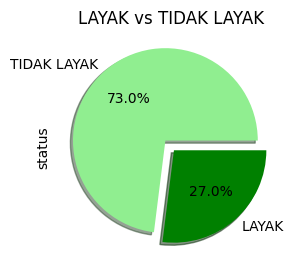

In [71]:
df['status'].value_counts().plot(kind='pie',figsize=(3,3),autopct='%1.1f%%',colors=['lightgreen','green'],shadow=True,explode=[0.1,0.04])
plt.title('LAYAK vs TIDAK LAYAK', size=12)
plt.show()

In [72]:
def diagnostic_plots(df,variable):
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[variable],bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

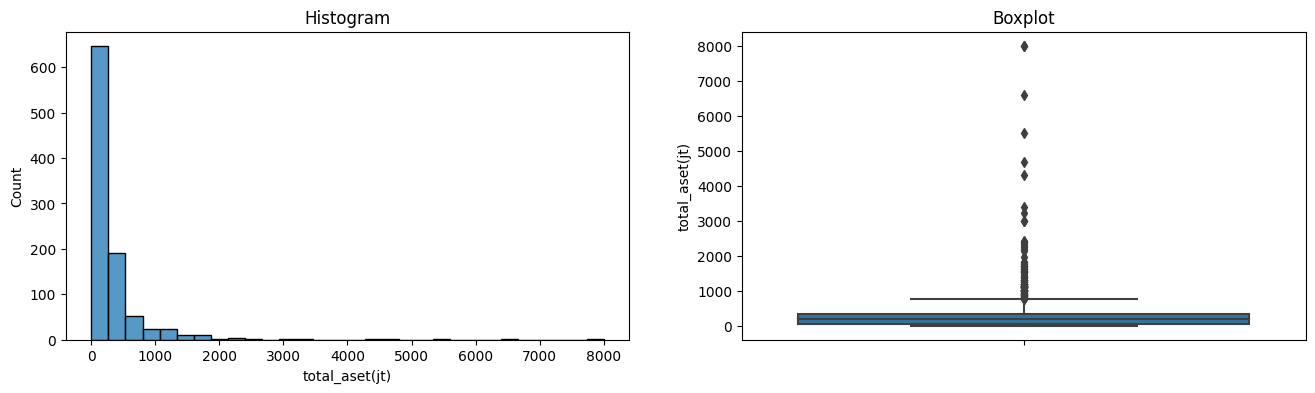

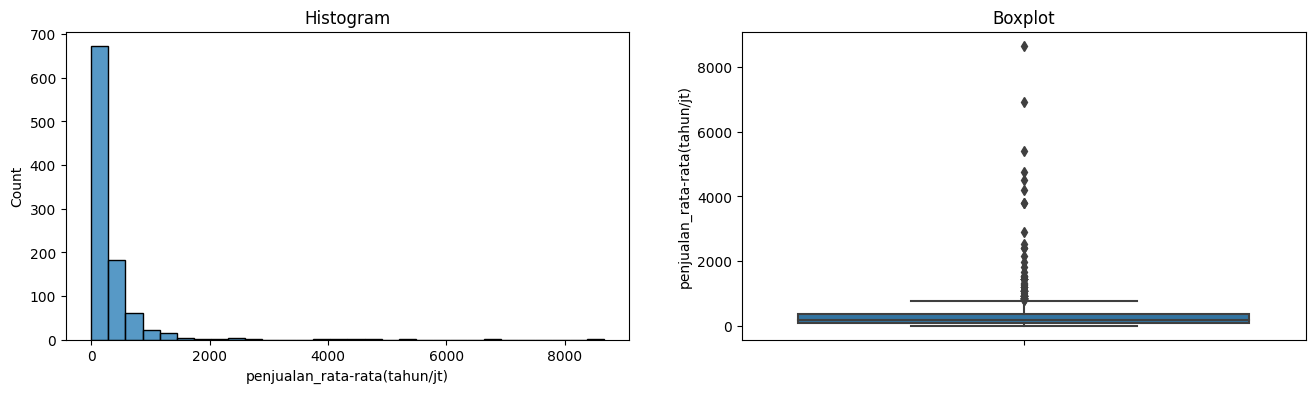

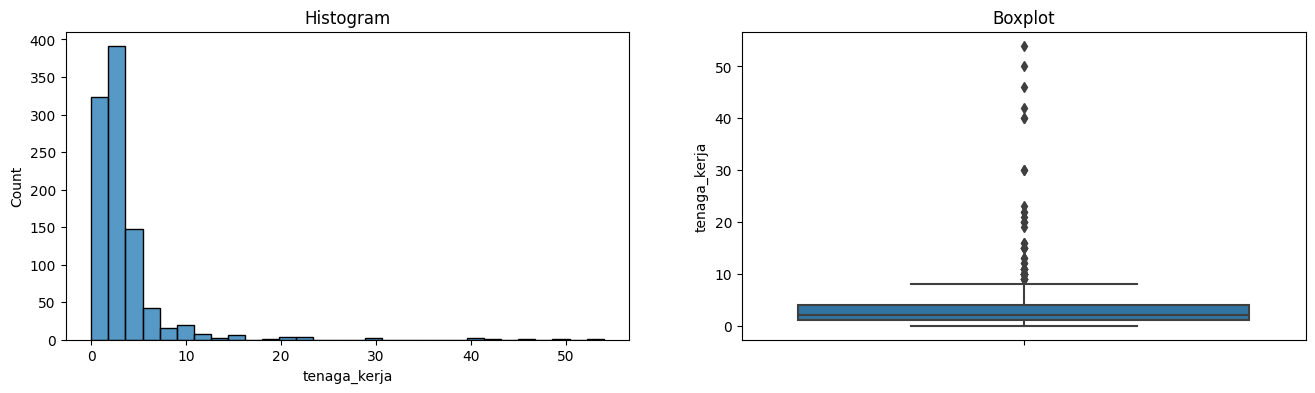

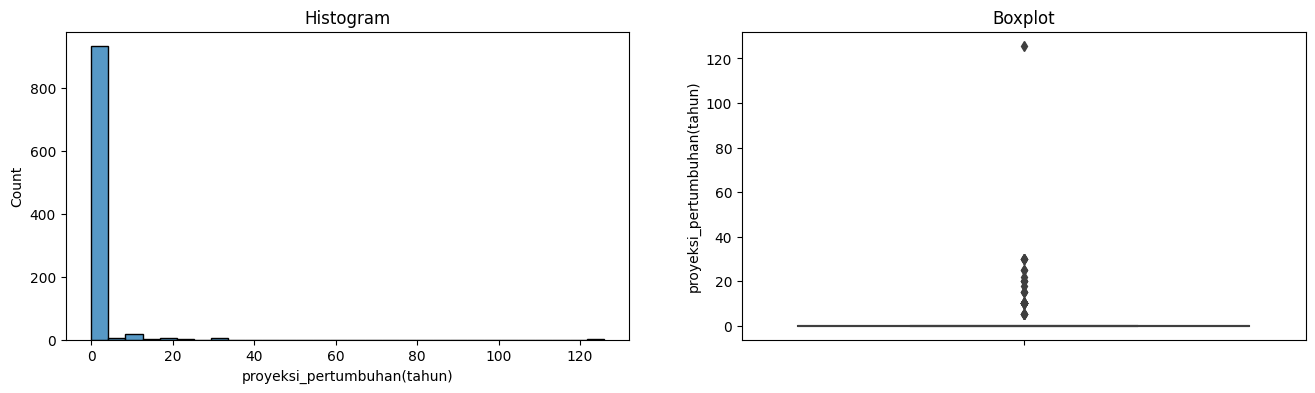

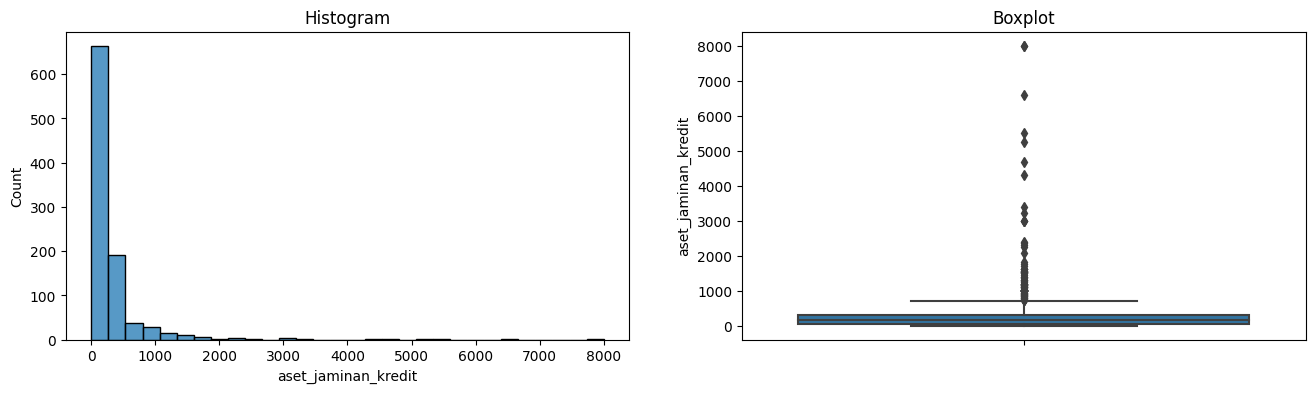

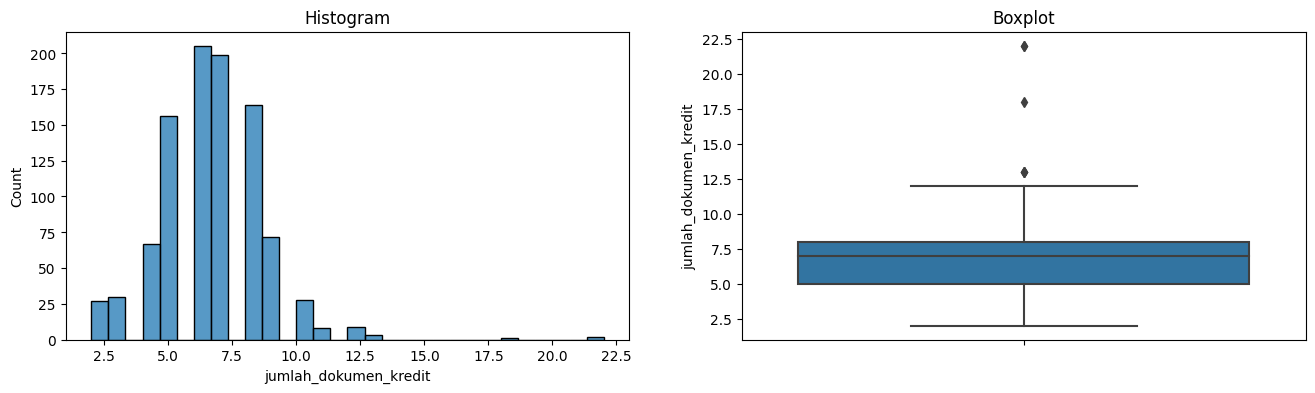

In [73]:
diagnostic_plots(df, 'total_aset(jt)')
diagnostic_plots(df, 'penjualan_rata-rata(tahun/jt)')
diagnostic_plots(df, 'tenaga_kerja')
diagnostic_plots(df, 'proyeksi_pertumbuhan(tahun)')
diagnostic_plots(df, 'aset_jaminan_kredit')
diagnostic_plots(df, 'jumlah_dokumen_kredit')

Handling Outlier

In [74]:
!pip install feature-engine

from feature_engine.outliers import Winsorizer

In [75]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails
                          fold=1.5,
                          variables=['total_aset(jt)', 'penjualan_rata-rata(tahun/jt)',
                                     'tenaga_kerja', 'aset_jaminan_kredit', 'jumlah_dokumen_kredit'])

windsoriser.fit(df)

df_t = windsoriser.transform(df)

In [76]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'total_aset(jt)': -372.62499999999994, 'penjualan_rata-rata(tahun/jt)': -360.0, 'tenaga_kerja': -3.5, 'aset_jaminan_kredit': -340.0, 'jumlah_dokumen_kredit': 0.5}
Right Tail Caps :  {'total_aset(jt)': 757.175, 'penjualan_rata-rata(tahun/jt)': 792.0, 'tenaga_kerja': 8.5, 'aset_jaminan_kredit': 700.0, 'jumlah_dokumen_kredit': 12.5}


In [77]:
print('Dataframe - Before Capping')
print(df.describe())
print('')
print('Dataframe - After Capping')
print(df_t.describe())

Dataframe - Before Capping
       total_aset(jt)  penjualan_rata-rata(tahun/jt)  tenaga_kerja  \
count      971.000000                     971.000000    971.000000   
mean       325.916864                     308.458764      3.267765   
std        624.984481                     573.837634      4.561423   
min          0.000000                       0.000000      0.000000   
25%         51.050000                      72.000000      1.000000   
50%        174.000000                     162.000000      2.000000   
75%        333.500000                     360.000000      4.000000   
max       8000.000000                    8661.000000     54.000000   

       proyeksi_pertumbuhan(tahun)  aset_jaminan_kredit  jumlah_dokumen_kredit  
count                   971.000000           971.000000             971.000000  
mean                      0.675386           309.856004               6.541710  
std                       5.070708           637.229268               2.060693  
min               

total_aset(jt) - Before Capping


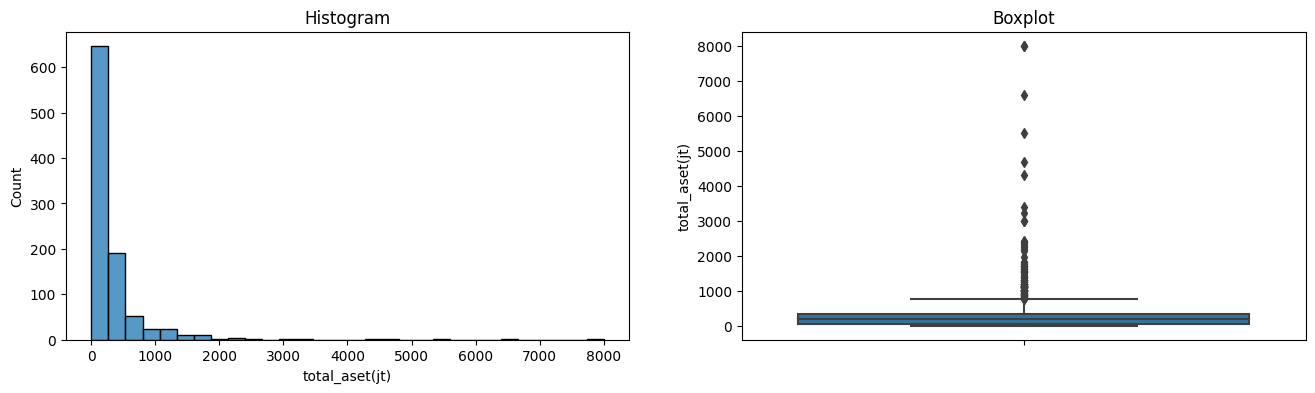


total_aset(jt) - After Capping


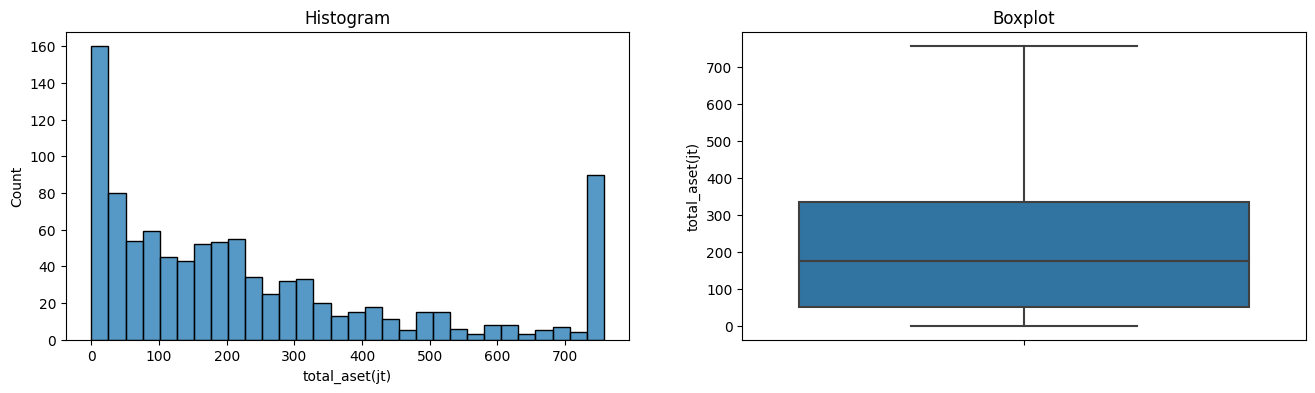


penjualan_rata-rata(tahun/jt) - Before Capping


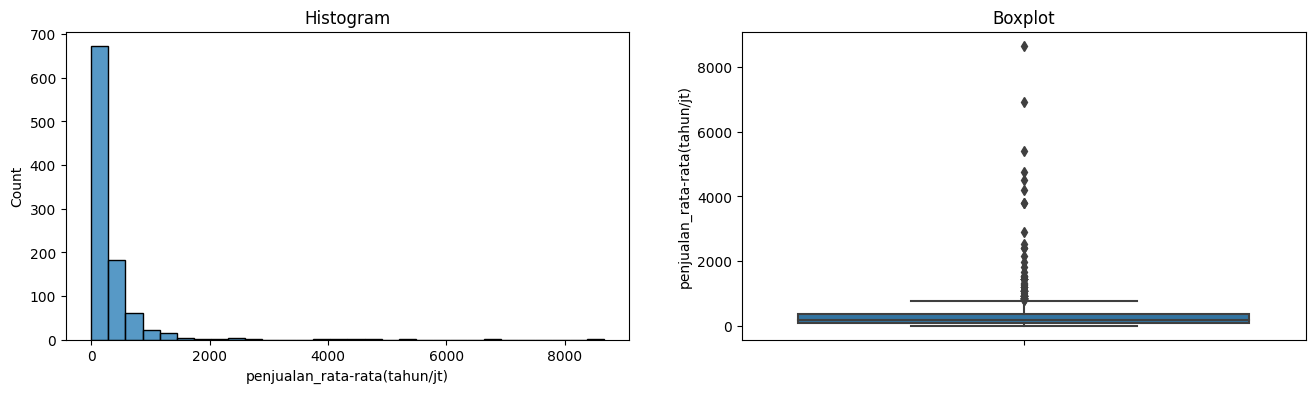


penjualan_rata-rata(tahun/jt) - After Capping


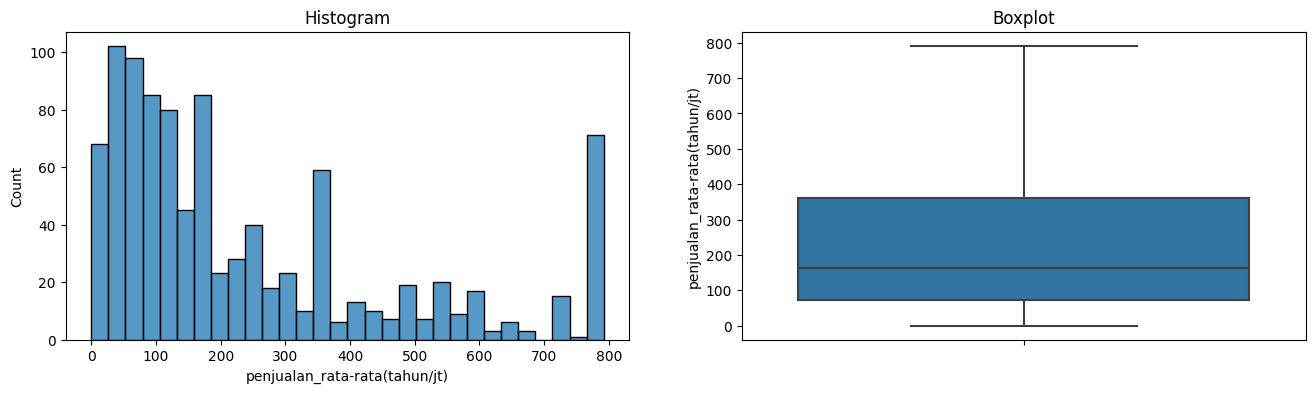


tenaga_kerja - Before Capping


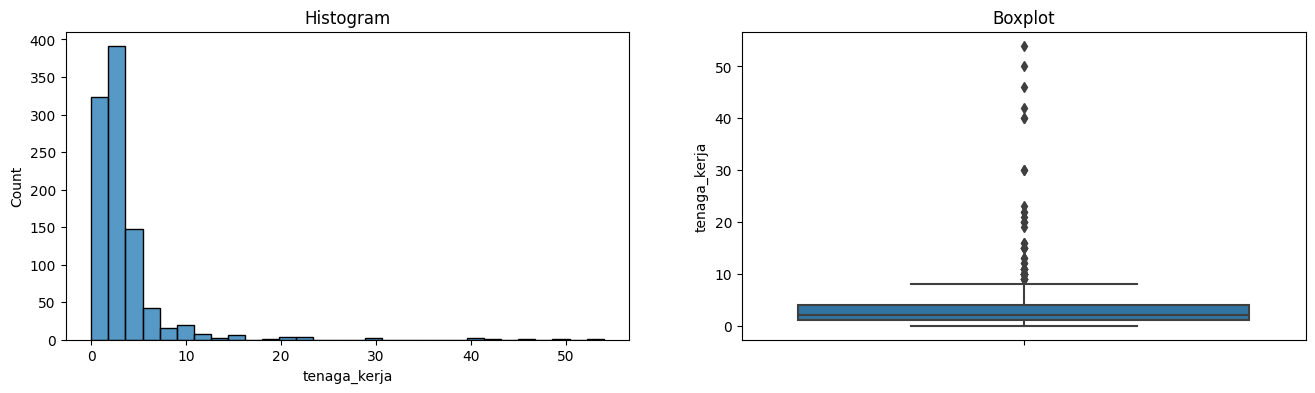


tenaga_kerja - After Capping


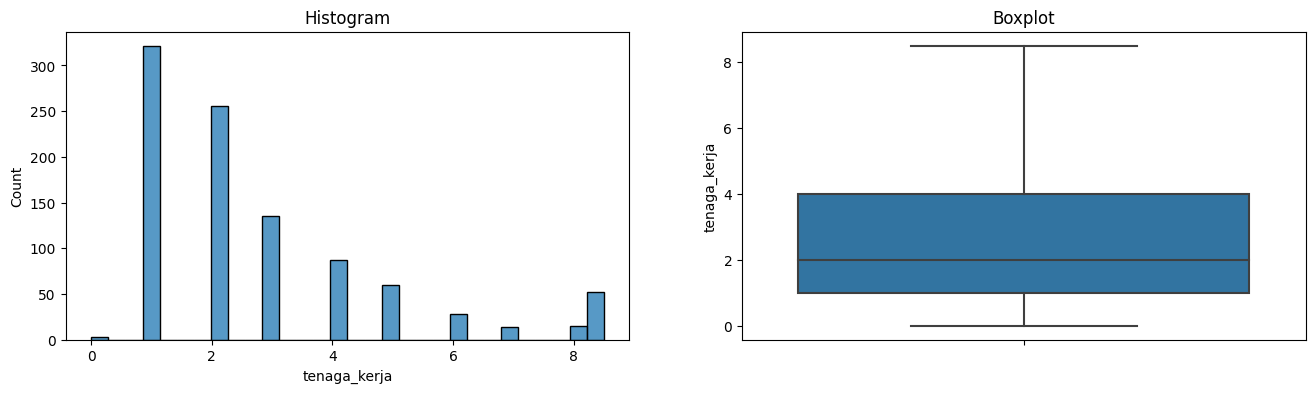

total_aset(jt) - Before Capping


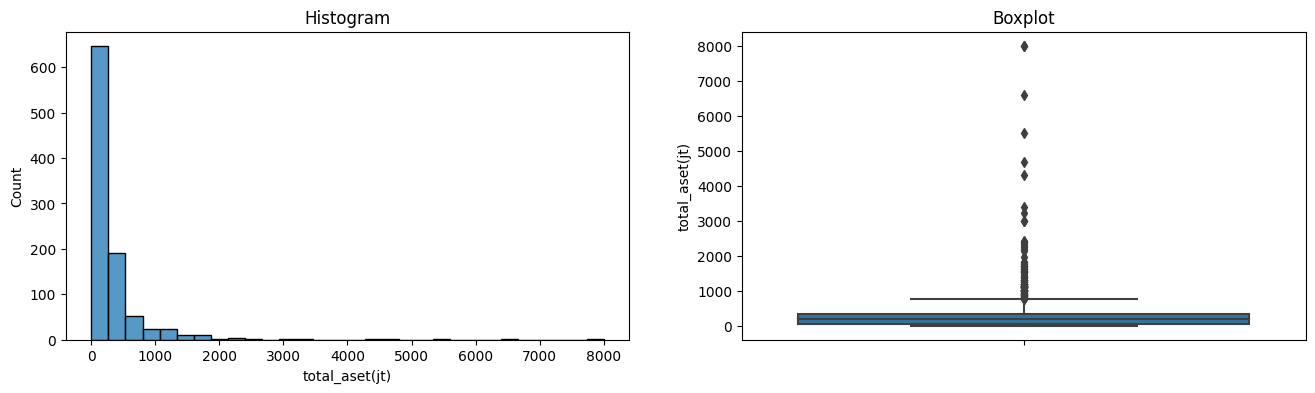


total_aset(jt) - After Capping


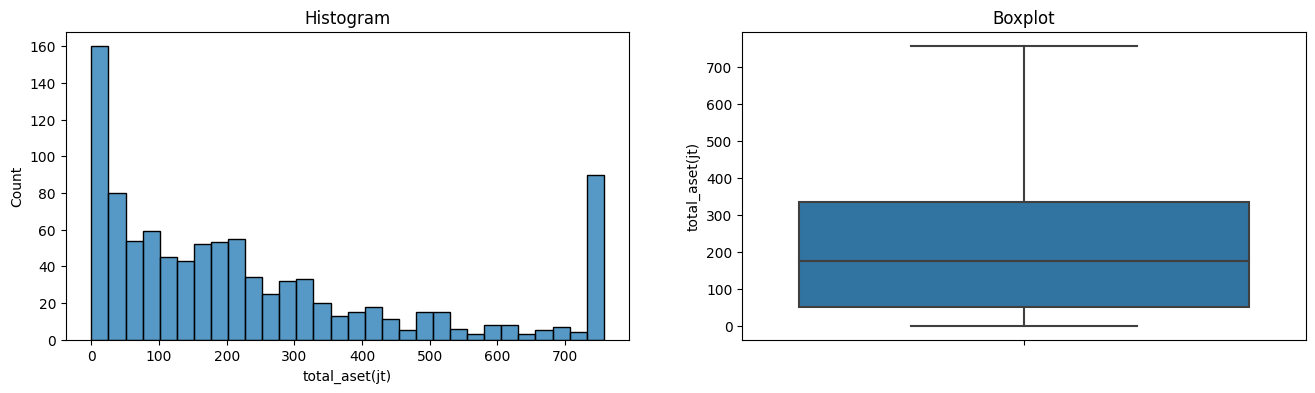


aset_jaminan_kredit - Before Capping


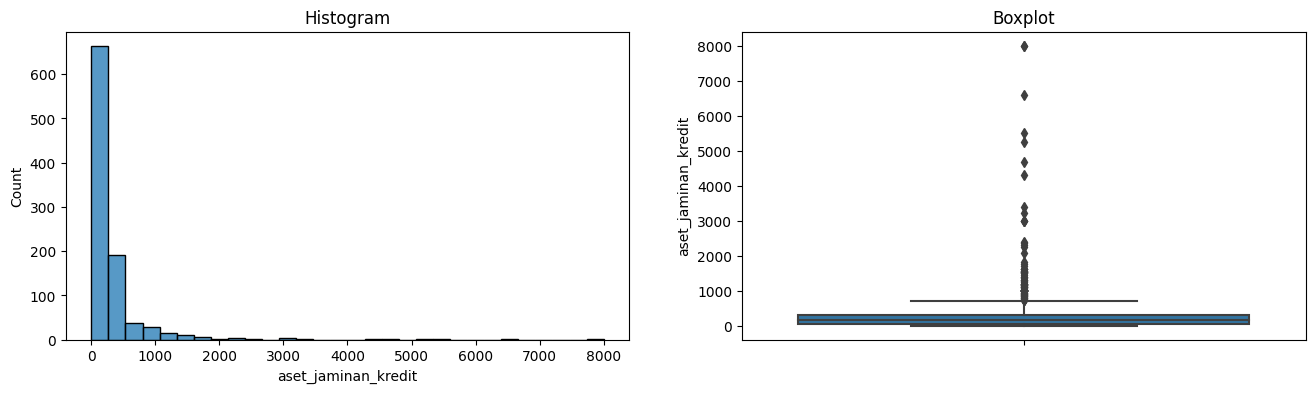


aset_jaminan_kredit - After Capping


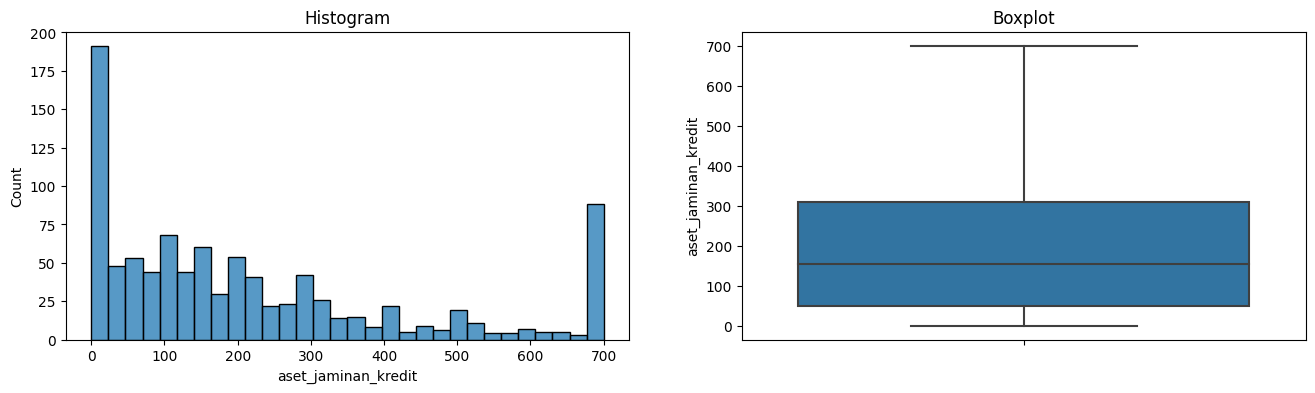


jumlah_dokumen_kredit - Before Capping


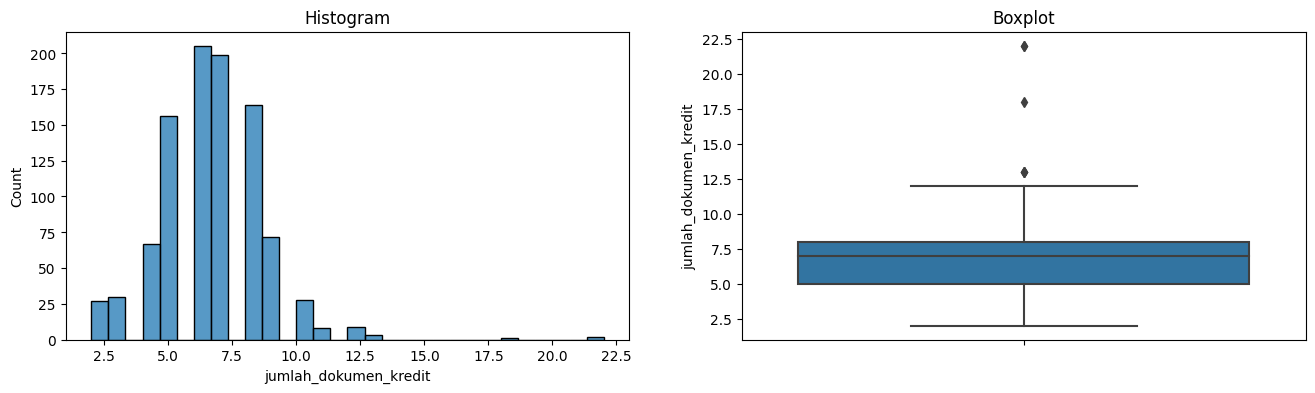


jumlah_dokumen_kredit - After Capping


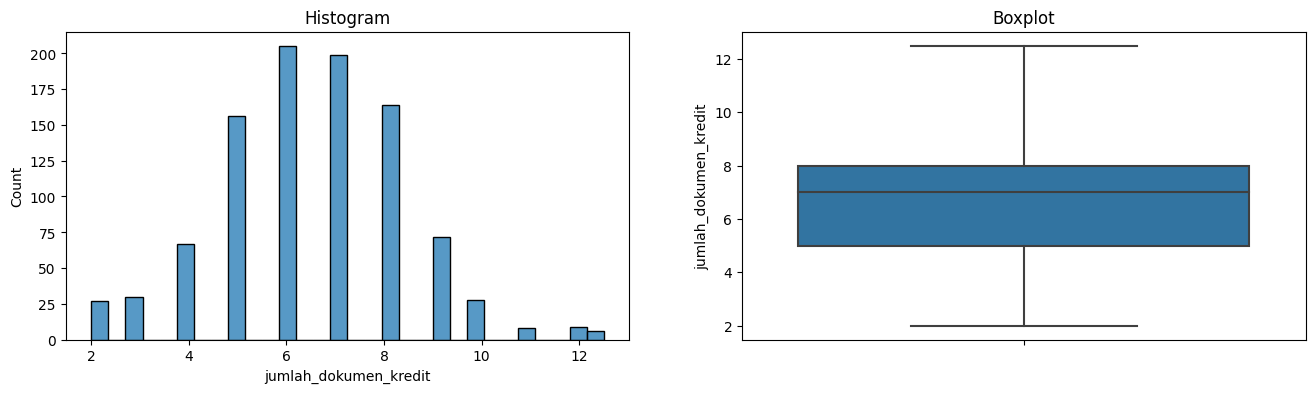

In [78]:
# Let's find outliers in `DIS`, `LSTAT`, `CRIM`

print('total_aset(jt) - Before Capping')
diagnostic_plots(df, 'total_aset(jt)')
print('\ntotal_aset(jt) - After Capping')
diagnostic_plots(df_t, 'total_aset(jt)')

print('\npenjualan_rata-rata(tahun/jt) - Before Capping')
diagnostic_plots(df, 'penjualan_rata-rata(tahun/jt)')
print('\npenjualan_rata-rata(tahun/jt) - After Capping')
diagnostic_plots(df_t, 'penjualan_rata-rata(tahun/jt)')

print('\ntenaga_kerja - Before Capping')
diagnostic_plots(df, 'tenaga_kerja')
print('\ntenaga_kerja - After Capping')
diagnostic_plots(df_t, 'tenaga_kerja')
print('total_aset(jt) - Before Capping')
diagnostic_plots(df, 'total_aset(jt)')
print('\ntotal_aset(jt) - After Capping')
diagnostic_plots(df_t, 'total_aset(jt)')

print('\naset_jaminan_kredit - Before Capping')
diagnostic_plots(df, 'aset_jaminan_kredit')
print('\naset_jaminan_kredit - After Capping')
diagnostic_plots(df_t, 'aset_jaminan_kredit')

print('\njumlah_dokumen_kredit - Before Capping')
diagnostic_plots(df, 'jumlah_dokumen_kredit')
print('\njumlah_dokumen_kredit - After Capping')
diagnostic_plots(df_t, 'jumlah_dokumen_kredit')

In [79]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Mengganti nilai label menjadi sesuai dengan yang diinginkan
df_t['status_encoded'] = df_t['status'].apply(lambda x: 1 if x == 'LAYAK' else 0)

# Menampilkan beberapa baris data teratas setelah perubahan
df_t.head()

# Transformasi nilai label sesuai dengan 'status_encoded'
df_t['status_encoded'] = le.fit_transform(df_t['status_encoded'])

# Menampilkan beberapa baris data teratas setelah transformasi
df_t.head()

,umkm,total_aset(jt),penjualan_rata-rata(tahun/jt),tenaga_kerja,proyeksi_pertumbuhan(tahun),aset_jaminan_kredit,jumlah_dokumen_kredit,status,status_encoded
0,Kios Perancangan,361.0,400.0,1.0,25.0,0.0,5.0,LAYAK,1
1,LAPAK BAHTERA AYAM POTONG,44.6,576.0,1.0,30.0,15.0,3.0,LAYAK,1
2,Budidaya Jamur Tiram,15.3,36.0,1.0,10.0,30.0,6.0,TIDAK LAYAK,0
3,Holtikultura Srimulyanti,125.8,75.6,3.0,125.8,92.0,12.0,LAYAK,1
4,Toko Pertanian Bu Siswarsini,218.0,84.0,2.0,5.0,39.0,7.0,TIDAK LAYAK,0


<ipython-input-80-5b2e2a30e59d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_t.corr(),annot=True)


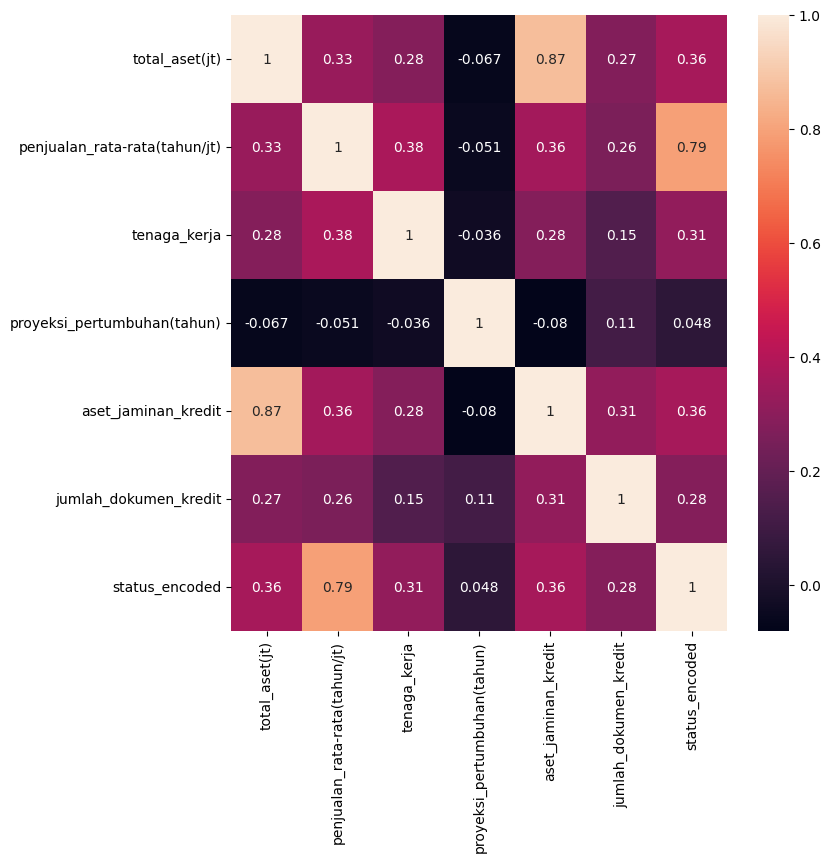

In [80]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_t.corr(),annot=True)
plt.show()

In [108]:
df_t = df_t[['total_aset(jt)',	'penjualan_rata-rata(tahun/jt)',	'tenaga_kerja',	'aset_jaminan_kredit',	'jumlah_dokumen_kredit',	'status_encoded']]

In [110]:
new = df_t.drop(columns=['status_encoded'])

In [111]:
# Separating the Feature and Labels
from imblearn.over_sampling import RandomOverSampler

# Separating the Feature and Labels
X = new
y = df_t['status_encoded']

ros = RandomOverSampler(random_state=13)

# Fit predictor and target variable
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', y.value_counts())
print(' ')
print('Resample dataset shape', y_ros.value_counts())

Original dataset shape 0    709
1    262
Name: status_encoded, dtype: int64
 
Resample dataset shape 1    709
0    709
Name: status_encoded, dtype: int64


In [112]:
print(new)

      total_aset(jt)  penjualan_rata-rata(tahun/jt)  tenaga_kerja  \
0              361.0                          400.0           1.0   
1               44.6                          576.0           1.0   
2               15.3                           36.0           1.0   
3              125.8                           75.6           3.0   
4              218.0                           84.0           2.0   
...              ...                            ...           ...   
1020           132.0                           75.0           1.0   
1021           200.0                           80.0           2.0   
1022            90.0                          500.0           5.0   
1023            50.0                           60.0           2.0   
1024           300.0                          120.0           2.0   

      aset_jaminan_kredit  jumlah_dokumen_kredit  
0                     0.0                    5.0  
1                    15.0                    3.0  
2                 

In [113]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3, random_state=0)

In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    tf.keras.layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [119]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        accuracy = logs.get('accuracy')
        val_accuracy = logs.get('val_accuracy')
        target_accuracy = 0.97
        target_val_accuracy = 0.97

        if accuracy and accuracy > target_accuracy and val_accuracy and val_accuracy > target_val_accuracy:
            print("\n Target telah dicapai \n Proses selesai.")
            self.model.stop_training = True

callback = Callback()

In [120]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9)

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [121]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/1000
31/31 [==============================] - 1s 7ms/step - loss: 6.2444 - accuracy: 0.6109 - val_loss: 4.0061 - val_accuracy: 0.6221
Epoch 2/1000
31/31 [==============================] - 0s 2ms/step - loss: 3.8449 - accuracy: 0.6310 - val_loss: 3.6758 - val_accuracy: 0.6831
Epoch 3/1000
31/31 [==============================] - 0s 3ms/step - loss: 3.5825 - accuracy: 0.6462 - val_loss: 3.4495 - val_accuracy: 0.7042
Epoch 4/1000
31/31 [==============================] - 0s 2ms/step - loss: 3.3039 - accuracy: 0.6704 - val_loss: 3.2443 - val_accuracy: 0.7207
Epoch 5/1000
31/31 [==============================] - 0s 3ms/step - loss: 3.0928 - accuracy: 0.6704 - val_loss: 3.0604 - val_accuracy: 0.7418
Epoch 6/1000
31/31 [==============================] - 0s 3ms/step - loss: 2.9131 - accuracy: 0.6966 - val_loss: 2.9061 - val_accuracy: 0.8099
Epoch 7/1000
31/31 [==============================] - 0s 2ms/step - loss: 2.7569 - accuracy: 0.7067 - val_loss: 2.7336 - val_accuracy: 0.7934
Epoch 

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                384       
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (

In [127]:
model.predict(np.array([[500,	500.0,	1,	25.0,	5]]))

1/1 [==============================] - 0s 24ms/step


array([[0.9992682]], dtype=float32)

14/14 [==============================] - 0s 1ms/step


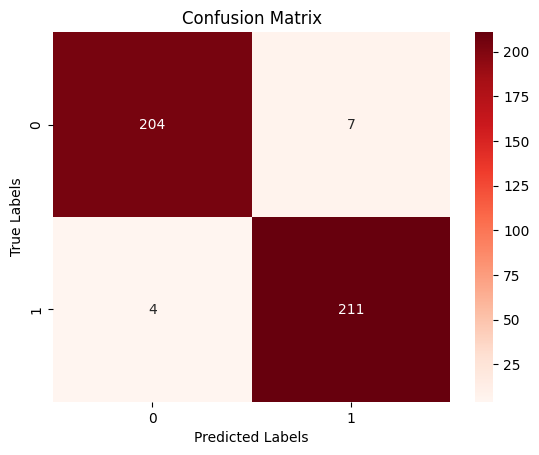

In [128]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert continuous variable to binary labels
threshold = 0.5
y_pred_binary = (y_pred >= threshold).astype(int)

# Create the confusion matrix
confusion = confusion_matrix(y_pred_binary, y_test)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion, annot=True, cmap="Reds", fmt="d")

# Set the axis labels
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Set the title
plt.title("Confusion Matrix")

# Display the plot
plt.show()

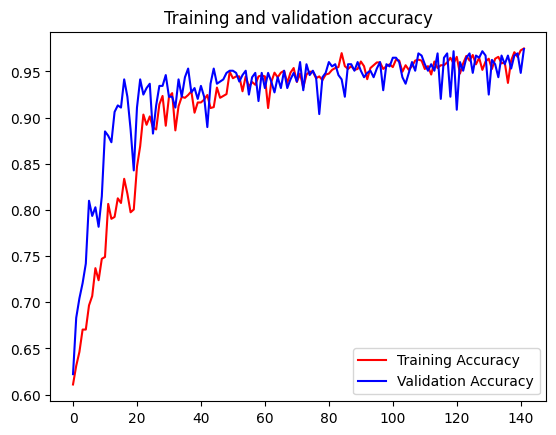

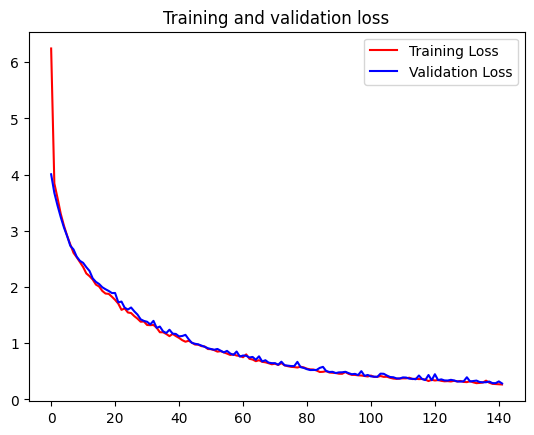

In [129]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))  # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()  # Add legend to the plot
plt.show()
print("")

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()  # Add legend to the plot
plt.show()

In [130]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Generate classification report
report = classification_report(y_test, y_pred_binary)

# Print the metrics report
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)

Precision: 0.9813953488372092
Recall: 0.9678899082568807
F1 Score: 0.9745958429561201
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       208
           1       0.98      0.97      0.97       218

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426



Save model

In [131]:
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [132]:
# Save model weights
model.save_weights('model_weights.h5')

# Load model weight
model.load_weights('model_weights.h5')

In [133]:
# Save model has build
model.save('saved_model')

In [134]:
# Save model has build
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [135]:
# Convert the SavedModel to TFLite format with optimizations
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)